# Health Insurance Cost by Linear Regression  
In this project we want to know the cost of health insurance of a person and will see how it may effect with the other factors  

### Step 1- Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2- Importing the data set 

In [2]:
ins= pd.read_csv("insurance.csv")

#### Step 3- Quick look at data 

In [10]:
#looking at first 5 rows of data set 
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#listing the column names 
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#Checking total no. of rows and coloumns
ins.shape

(1338, 7)

In [6]:
#overall info of data set , which type of data we have 
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Here we have  3 catagorical features and 4 Numerical features**
- Catagorical features 
   - sex
   - smoker 
   - region
- Numerical features 
   - age
   - bmi 
   - children
   - charges 

#### Step 4- Data Visualization and Wrangling  

##### Checking if there is any null value

In [66]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### 4.1 Numerical Features  
   - 4.1.1 - Charges 

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

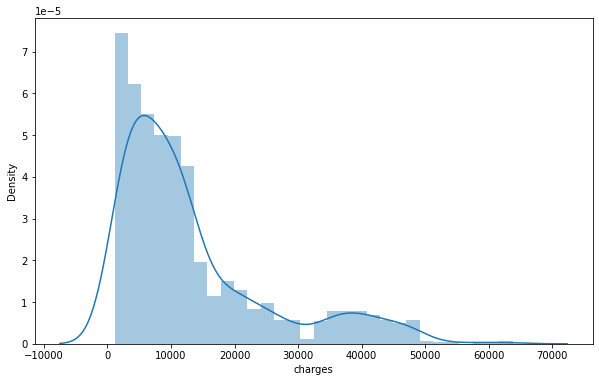

In [62]:
plt.figure(figsize=(10,6)) # Setting the size of required figure 
sns.distplot(ins['charges'])


C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

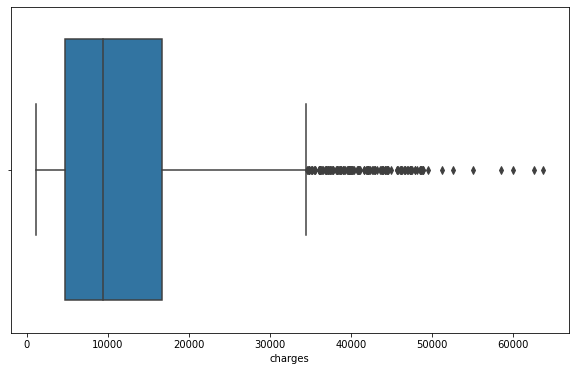

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(ins["charges"])


Here we see in interquartile range median is slighlty skewed to left also we have many outlyers , we might need to deal with this data 

  - 4.1.2 - Age

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

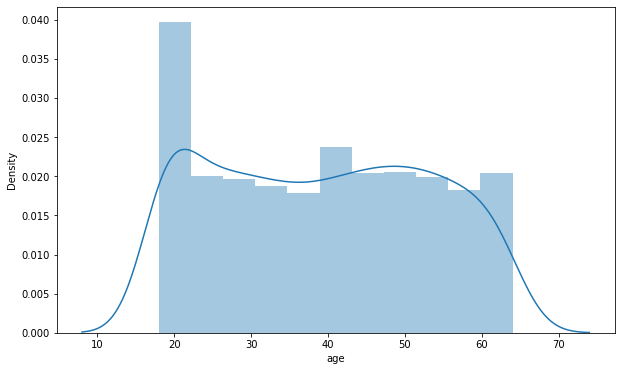

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(ins['age'])

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

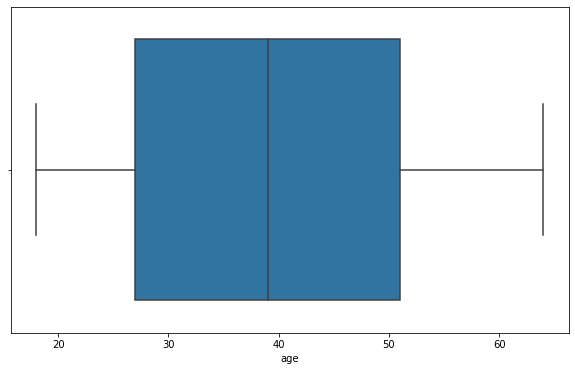

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(ins["age"])


Here we see the median is almost at midd in interquartile range 

- 4.1.3-  bmi


C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

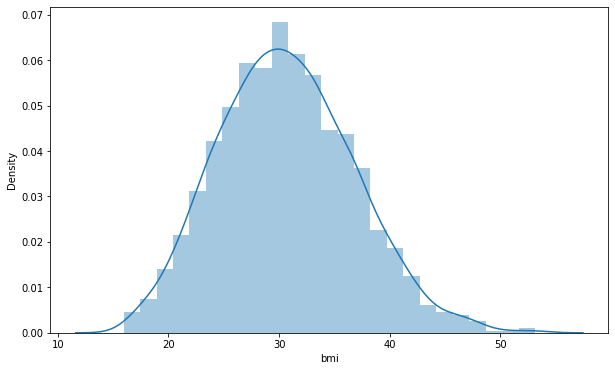

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(ins['bmi'])

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

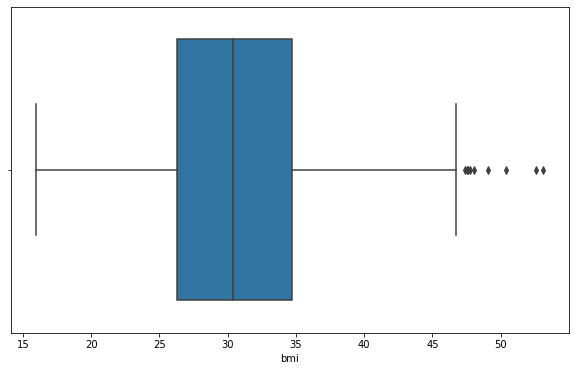

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(ins["bmi"])

Here we see the median is almost at mid in interquartile range with some outlyers

##### 4.2-  Checking Co-relation between the numerical data 

<AxesSubplot:>

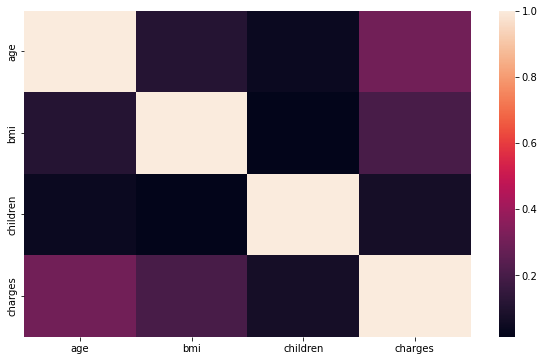

In [41]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(ins.corr())

<AxesSubplot:>

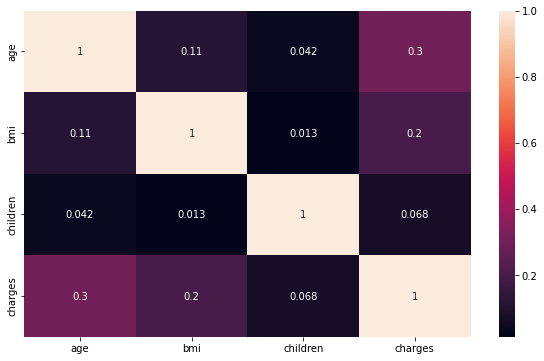

In [42]:
# with values
fig = plt.figure(figsize=(10,6))
sns.heatmap(ins.corr(), annot=True)

Here we see that **charges** are in relation with 
- bmi 
- age

<AxesSubplot:xlabel='age', ylabel='charges'>

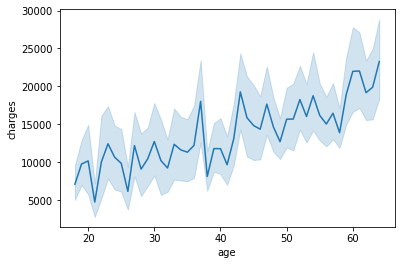

In [49]:
sns.lineplot(x= "age", y= "charges" , data = ins )

<AxesSubplot:xlabel='bmi', ylabel='charges'>

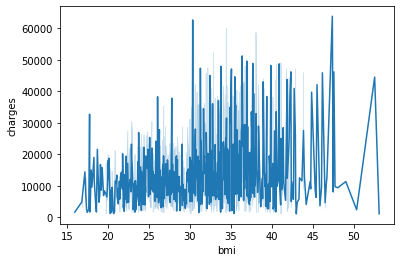

In [50]:
sns.lineplot(x= "bmi", y= "charges" , data = ins )

<AxesSubplot:xlabel='bmi', ylabel='charges'>

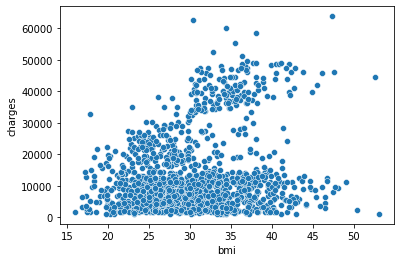

In [55]:
sns.scatterplot(x='bmi', y='charges', data=ins )

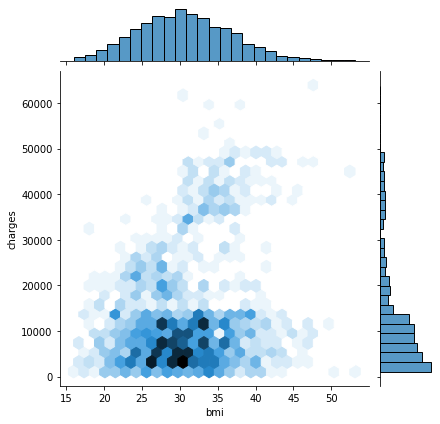

In [65]:
sns.jointplot(x='bmi', y='charges', data=ins ,  kind='hex')

#### 4.3 Catagorical features
now we will check how the **charges** variates with our catagorical features 

### Transforming our catagorical features 

Now we will transform our catagorical values and after that will check the correlation 

- Transforming [Sex]

In [70]:
ins["sex"].unique()

array(['female', 'male'], dtype=object)

In [73]:
ins["sex"]= ins["sex"].replace("male", 1)
ins["sex"]= ins["sex"].replace("female", 0)

- Transforming [Smoker]

In [71]:
ins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [75]:
ins["smoker"]= ins["smoker"].replace("yes", 1)
ins["smoker"]= ins["smoker"].replace("no", 0)

In [72]:
ins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

- Transforming [region]

In [77]:
# creating dummies for region coloumn 
r_dummies = pd.get_dummies(ins["region"])

In [78]:
# Drop column 
ins = ins.drop('region',axis = 1)
# Join 
ins = ins.join(r_dummies)
ins.head() 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<AxesSubplot:>

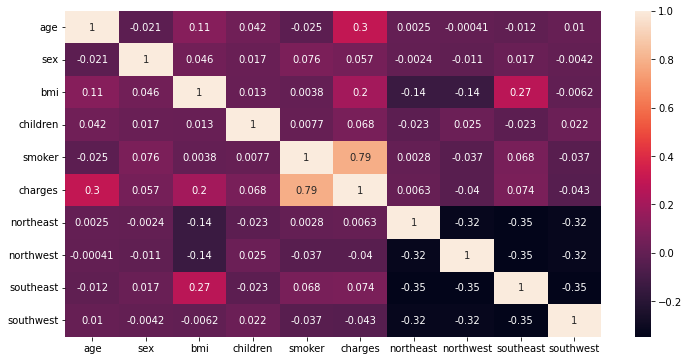

In [80]:
# now checking the correlation 
fig = plt.figure(figsize=(12,6))
sns.heatmap(ins.corr(), annot=True)

Here we see **charges** are in correaltion with 
- age
- bmi
- smoker 

### Step 5- Creating a Model 

In [81]:
X= ins[["age","bmi", "smoker"]]
y= ins["charges"]

In [83]:
# importing Linear regression algorithm from sklearn library 
from sklearn.linear_model import LinearRegression
# fitting our X and y values in this algorithm 
model = LinearRegression().fit(X,y)
model

LinearRegression()

### Step 6- Getting Prediction from Model 

In [87]:
# getting prediction in following way 
#model.predict([[age  ,bmi , smoker]])
model.predict([[19 ,27.9, 1]])

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26079.21861526])

In [96]:
#Cheching model co-efficient and intercept 
print(model.coef_)
print(model.intercept_)

[  259.54749155   322.61513282 23823.68449531]
-11676.830425187778


In [98]:
coeff_ins = pd.DataFrame(model.coef_,X.columns,columns=['Co-efficient'])
coeff_ins

,Co-efficient
age,259.547492
bmi,322.615133
smoker,23823.684495


### Step 7- Checking accuracy of the model. 

TO check the accurary we first have to split the data ,some for training the model and some for testting it 

##### Splitting the dataset into the Training data and Testing data

In [89]:
#import library 
from sklearn.model_selection import train_test_split 
# splitting the data : 80% training data and 20% testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
# fitting the training data in linear regression again 
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(X_train, y_train)
model1


LinearRegression()

In [116]:
# getting a prediction again 
model1.predict([[19 ,27.9, 1]])

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25916.43448944])

In [119]:
# getting prediction for whole values we splitted for test 
y_pred = model1.predict(X_test)

In [118]:
#importing library for test  
from sklearn.metrics import r2_score
# now testing between already know y_test values and y_pred values 
score = r2_score(y_test, y_pred)
score

0.7945500805653087

So according to this r2_score test our model is 79% accurate 

##### Regression Evaluation Metrics

In [103]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3960.8666198087158
MSE: 32693237.938726168
RMSE 5717.80009607945


# Print insurance cost 

In [109]:
age = input('What is your age ? \n')
bmi = input('What is your bmi  ? \n')
smoker= input('press 1 if you are  a smoker and 0 if not \n')
try:
    print('We predict {:.0f}$ will be your insurance cost .'.format(
        model.predict([[float(age), float(bmi),int(smoker)]])[0]))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

We predict 26079$ will be your insurance cost .


C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
